Plots: MassProfileCentreScatter
===============================

This example illustrates how to customize the mass profile centres plotted over data.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


This means the centre of every `MassProfile` of every `Galaxy` in a plot are plotted on the figure. 
A `Tracer` object is a good example of an object with many `MassProfiles`, so lets make one with three.

In [2]:
lens_galaxy_0 = al.Galaxy(
    redshift=0.25,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 1.0), einstein_radius=0.8, elliptical_comps=(0.2, 0.2)
    ),
)

lens_galaxy_1 = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, -1.0), einstein_radius=0.8, elliptical_comps=(0.2, 0.2)
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.SphSersic(
        centre=(0.1, 0.1), intensity=0.3, effective_radius=1.0, sersic_index=2.5
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy_0, lens_galaxy_1, source_galaxy])

We also need the `Grid2D` that we can use to make plots of the `Tracer`'s properties.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

The mass profile centres are an internal property of the `Tracer`, so we can plot them via an `Include2D` object.

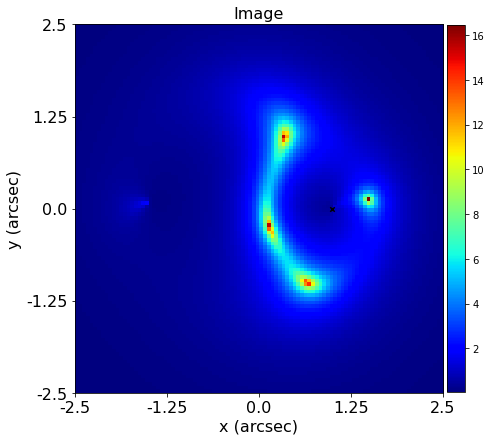

In [4]:
include_2d = aplt.Include2D(
    light_profile_centres=False,
    mass_profile_centres=True,
    critical_curves=False,
    caustics=False,
)
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid, include_2d=include_2d)
tracer_plotter.figures_2d(image=True)

The appearance of the mass profile centres are customized using a `MassProfileCentresScatter` object.

To plot the mass profile centres this object wraps the following matplotlib method:

 https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html

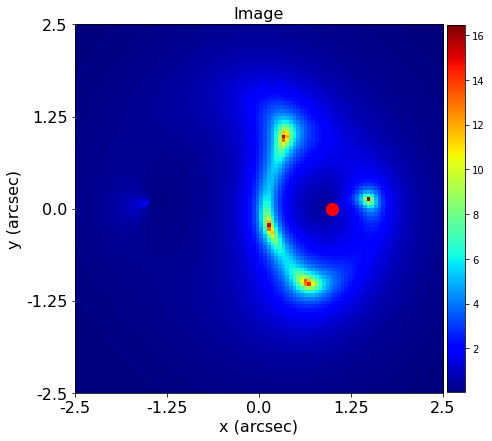

In [5]:
mass_profile_centres_scatter = aplt.MassProfileCentresScatter(marker="o", c="r", s=150)
mat_plot_2d = aplt.MatPlot2D(mass_profile_centres_scatter=mass_profile_centres_scatter)
tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures_2d(image=True)

By specifying two colors to the `MassProfileCentresScatter` object the mass profile centres of each plane
are plotted in different colors.

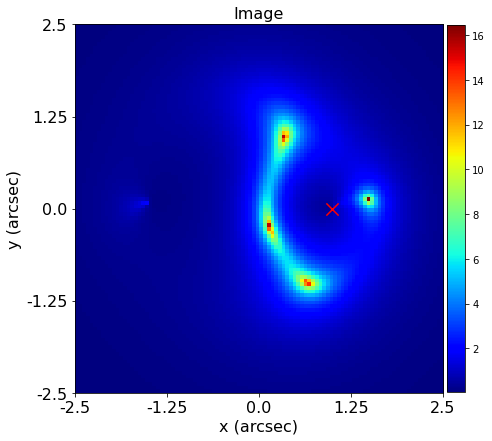

In [6]:
mass_profile_centres_scatter = aplt.MassProfileCentresScatter(c=["r", "w"], s=150)

mat_plot_2d = aplt.MatPlot2D(mass_profile_centres_scatter=mass_profile_centres_scatter)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures_2d(image=True)

To plot the mass profile centres manually, we can pass them into a` Visuals2D` object. This is useful for plotting 
the centres on figures where they are not an internal property, like an `Array2D`.

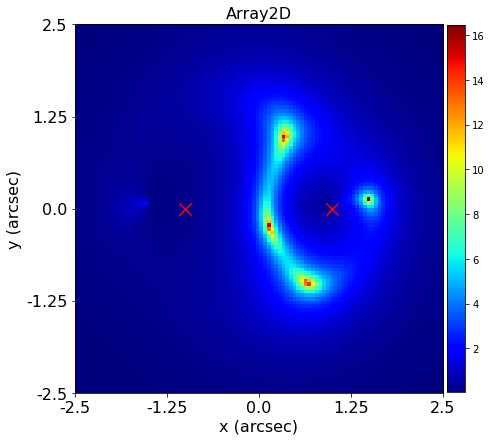

In [7]:
mass_profile_centres = tracer.extract_attribute(
    cls=al.mp.MassProfile, attr_name="centre"
)
visuals_2d = aplt.Visuals2D(mass_profile_centres=mass_profile_centres)
image = tracer.image_2d_from_grid(grid=grid)

array_plotter = aplt.Array2DPlotter(
    array=image, mat_plot_2d=mat_plot_2d, visuals_2d=visuals_2d
)
array_plotter.figure_2d()

Finish.